In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

%matplotlib inline

# K-Means

In [2]:
# import kmeans estimator
from sklearn.cluster import KMeans

In [3]:
from sklearn.datasets import make_blobs

# generate synthetic two-dimensional data
X, y = make_blobs(n_samples=500, centers=3, 
                  cluster_std=1.8, random_state=42)

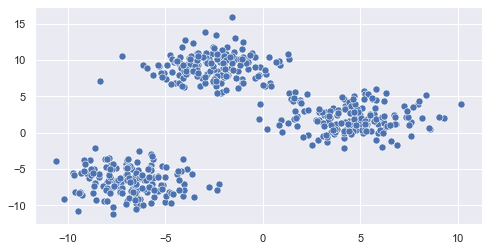

In [4]:
# plot the data
fig,ax=plt.subplots(figsize=(8,4))
sns.scatterplot(x=X[:,0], y=X[:,1], s=50);

In [5]:
# specify number of clusters
kmeans = KMeans(n_clusters=3)

# train the model
kmeans.fit(X)

# predict clusters
y_pred = kmeans.predict(X)

In [6]:
print(kmeans.cluster_centers_)
print(kmeans.labels_)

[[-6.79245828 -6.65774811]
 [-2.56531875  9.09355876]
 [ 4.55690488  1.94230495]]
[0 2 2 1 2 2 0 2 2 0 2 1 2 1 2 2 1 0 0 1 2 1 2 0 0 2 2 0 0 1 2 1 1 1 2 2 2
 2 0 0 2 1 1 1 1 2 2 2 2 0 0 1 0 0 2 1 1 0 2 0 0 1 2 0 2 0 2 0 1 2 2 2 2 0
 1 0 1 2 1 1 0 1 2 1 0 0 0 0 2 1 0 2 1 2 2 0 1 1 1 0 2 1 1 0 0 1 1 0 1 0 0
 0 0 0 0 2 1 0 2 0 1 1 2 2 0 2 1 2 0 0 0 2 2 0 2 0 0 0 2 1 0 0 2 2 0 0 0 1
 1 1 2 0 2 2 1 0 1 0 2 2 0 0 1 1 0 1 1 2 0 0 0 1 1 0 0 1 1 2 2 2 1 0 1 1 0
 0 1 2 1 0 0 0 0 0 1 2 1 1 0 2 1 1 0 0 2 0 2 1 1 0 0 2 0 1 1 0 1 0 1 2 2 1
 0 1 2 1 1 0 2 2 2 2 1 0 0 0 1 2 1 2 2 2 1 1 0 0 2 1 1 2 1 1 1 1 2 1 0 1 0
 1 1 1 0 1 2 2 2 1 2 2 1 1 2 0 1 1 1 1 0 0 1 2 1 1 0 1 2 0 2 2 0 1 1 1 0 1
 0 2 2 1 2 0 2 2 1 2 2 2 2 1 2 0 2 2 2 0 0 2 2 1 0 2 2 0 0 0 2 0 0 0 0 0 2
 0 1 0 1 1 0 1 2 2 1 1 2 1 2 1 2 2 2 1 2 0 0 2 0 1 2 1 2 1 2 2 0 1 2 2 1 0
 1 0 1 2 0 1 0 2 0 0 2 0 1 2 0 0 1 2 0 2 0 2 1 1 2 0 2 1 1 1 2 0 2 1 2 2 0
 0 2 2 0 1 2 0 1 2 1 1 2 1 1 1 0 0 2 1 2 0 1 1 2 0 2 2 0 0 2 0 1 1 0 2 0 1
 1 0 2 0 1 1 2 0 1

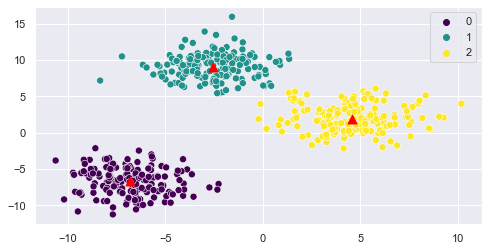

In [7]:
fig,ax=plt.subplots(figsize=(8,4))
sns.scatterplot(x=X[:,0],y=X[:,1], hue=y_pred, s=50, palette='viridis')

centers=kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:, 1], marker='^', c='red', s=80);

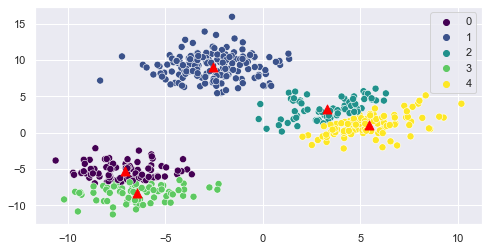

In [8]:
# specify number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# train and predict
y_pred = kmeans.fit_predict(X)

# plot clusters
fig,ax=plt.subplots(figsize=(8,4))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y_pred,s=50,palette='viridis')

centers=kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:, 1], marker='^', c='red', s=80);

## Select the right number of clusters

In [9]:
inertia = []  # create an empty list
for n_clusters in range(1, 10):
    kmeans = KMeans(n_clusters=n_clusters,random_state=42)
    kmeans.fit(X)
    # append the inertia values from each model to the list
    inertia.append(kmeans.inertia_)

D:\APP\CONDA\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


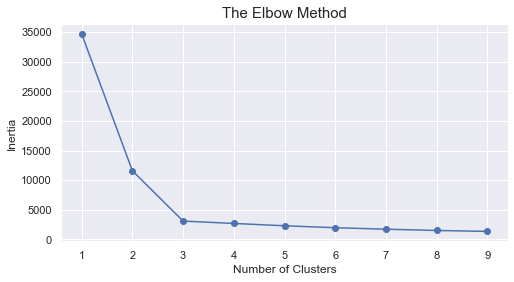

In [10]:
df_inertia = pd.DataFrame({'Cluster': range(1, 10), 'Inertia': inertia})

# plot the scree plot
plt.figure(figsize=(8, 4))
plt.plot(df_inertia.Cluster, df_inertia.Inertia, '-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method', fontsize=15);

It is quite obvious from the plot that number 3 is the best number for clusters

# Spectual Clustering

In [11]:
# create more complex shape data
from sklearn.datasets import make_moons
X, y = make_moons(1000, noise=.05, random_state=42)

In [12]:
# normalize dataset
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)

First, let's try the K-Means algorithm and see how it performs

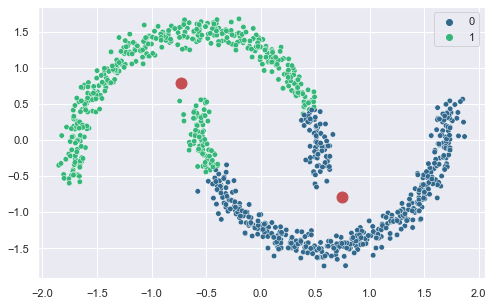

In [13]:
kmeans = KMeans(2, random_state=42)
y_pred = kmeans.fit_predict(X)

# plot the clustering results
fig,ax=plt.subplots(figsize=(8,5))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y_pred,s=30,palette='viridis');

# plot the centroids
centers=kmeans.cluster_centers_
ax.scatter(centers[:,0],centers[:, 1],marker='o',c='r',s=120);

As can be seen, K-Means does a poor job in clustering the data as it always try to construct a nice spherical shape around the centroid. Kmeans algorithm doesn’t assign datapoints that are far apart from each other to the same cluster even though they obviously belong to the same cluster.

One way to solve this for kmeans is to use the **kernel methods**. The idea is to tansform to a higher dimensional representation that make the data linearly separable. Many clustering algorithms work very well for such datasets such as **Spectral Clustering**.

In [14]:
from sklearn.cluster import SpectralClustering

D:\APP\CONDA\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


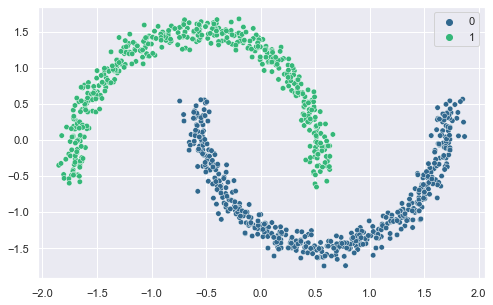

In [15]:
spec = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', 
                          assign_labels='kmeans')

labels = spec.fit_predict(X)

fig,ax=plt.subplots(figsize=(8,5))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, 
                s=30, palette='viridis');

# DBSCAN

In [16]:
from sklearn.cluster import DBSCAN

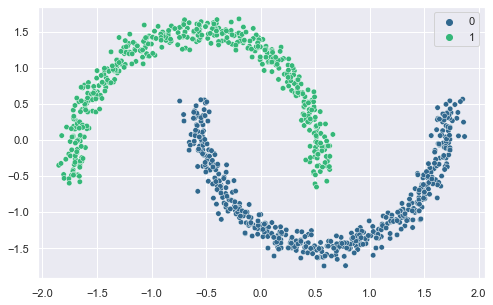

In [17]:
# train the model and then predict
db = DBSCAN()
lbls = db.fit_predict(X)

# plot the results
fig,ax=plt.subplots(figsize=(8,5))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=lbls,s=30,palette='viridis');

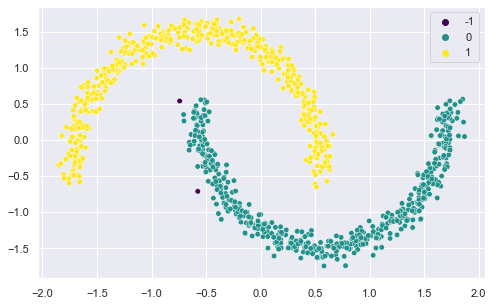

In [18]:
# set a smaller eps
db = DBSCAN(eps=0.15)
lbls = db.fit_predict(X)
fig,ax=plt.subplots(figsize=(8,5))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=lbls,s=30,palette='viridis');

# Gaussian Mixture Model

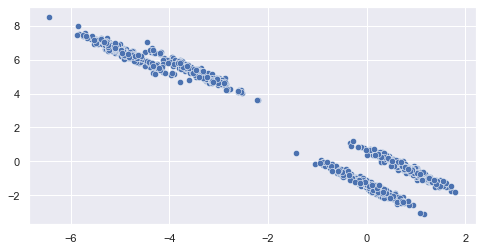

In [19]:
# Generate anisotropicly distributed data
X, y = make_blobs(n_samples=1000, centers=4, random_state=42)
transform = [[0.3, -0.3], [-0.3, 0.5]]
X = np.dot(X, transform)

# Plot the data
fig,ax=plt.subplots(figsize=(8,4))
sns.scatterplot(x=X[:,0],y=X[:,1],s=40);

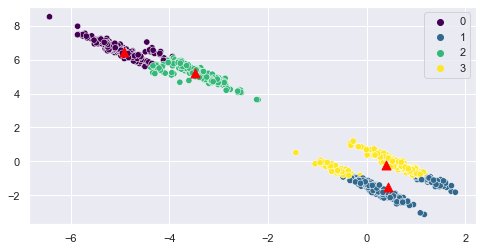

In [20]:
# specify number of clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# train & predict clusters
y_pred = kmeans.fit_predict(X)

# plot the results
fig,ax=plt.subplots(figsize=(8,4))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred,
                s=40, palette='viridis')

centers=kmeans.cluster_centers_
ax.scatter(centers[:,0], centers[:, 1],
           marker='^',c='red', s=80);

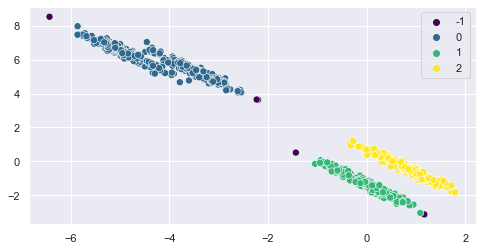

In [21]:
db = DBSCAN()
lbls = db.fit_predict(X)

# plot the results
fig,ax=plt.subplots(figsize=(8,4))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=lbls,
                s=50, palette='viridis');

In [22]:
from sklearn.mixture import GaussianMixture

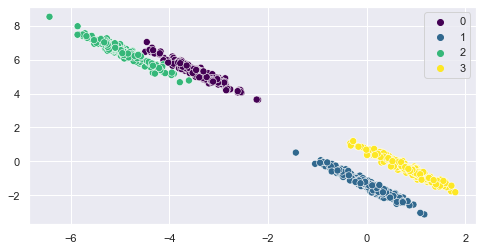

In [23]:
# train the model and then predict the labels
GM = GaussianMixture(n_components=4,random_state=42)
lbls = GM.fit_predict(X)

# plot the results
fig,ax=plt.subplots(figsize=(8,4))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=lbls,
                s=50,palette='viridis');

In [24]:
probs = GM.predict_proba(X)
print(probs.round(2))

[[0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]]


## Select right number of components

**AIC and BIC**

D:\APP\CONDA\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


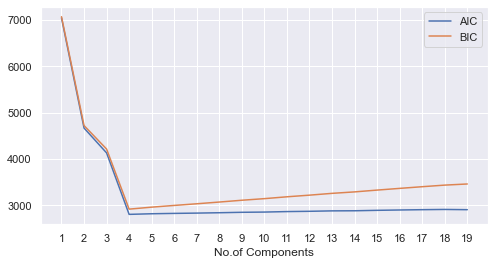

In [25]:
n_components = np.arange(1, 20)
GMM = [GaussianMixture(i, random_state=42).fit(X) 
       for i in n_components]

fig,ax=plt.subplots(figsize=(8,4))
ax.plot(n_components, [n.aic(X) for n in GMM], label='AIC')
ax.plot(n_components, [n.bic(X) for n in GMM], label='BIC')
plt.legend(loc=1)
plt.xlabel('No.of Components');
plt.xticks(ticks=n_components);

**Silhouette Score**

In [26]:
from sklearn.metrics import silhouette_score

for n_components in range(2, 21):
    GMM = GaussianMixture(n_components=n_components, random_state=42)
    
    components = GMM.fit_predict(X)
    sil_avg = silhouette_score(X, components)
    print("For n_clusters =", n_components,
          "The average silhouette_score is :", sil_avg)

For n_clusters = 2 The average silhouette_score is : 0.8408196908249491
For n_clusters = 3 The average silhouette_score is : 0.6787847274656919
For n_clusters = 4 The average silhouette_score is : 0.4976217771706729
For n_clusters = 5 The average silhouette_score is : 0.4181651281249809
For n_clusters = 6 The average silhouette_score is : 0.3773776525358983
For n_clusters = 7 The average silhouette_score is : 0.42732324193328813
For n_clusters = 8 The average silhouette_score is : 0.420154495933908
For n_clusters = 9 The average silhouette_score is : 0.42312889073009924
For n_clusters = 10 The average silhouette_score is : 0.4160304097944679
For n_clusters = 11 The average silhouette_score is : 0.4499799643753871
For n_clusters = 12 The average silhouette_score is : 0.41313608617034425
For n_clusters = 13 The average silhouette_score is : 0.40981804174859515
For n_clusters = 14 The average silhouette_score is : 0.4367110825147471
For n_clusters = 15 The average silhouette_score is : 0.

It can be seen that, the silhouettee scores return the highest when we set 2 components. This is not surprising, because the Silhouette score considers two metrics:

1. The mean distance between a sample and all other points in the same cluster.
2. The mean distance between a sample and all other points in the next nearest cluster.
i.e. it checks how much the clusters are compact and well separated.

Looking at the scatter plot, 2 clusters seems to be the best option based on the Silhouettee score, which satisfies its criteria. However, it is not the right clustering results.